In [1]:
# types
from numpy import array
# Imports 
import time
import datetime as dt
# Math
import pandas as pd
import numpy as np
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Ml
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
# Save Models
import joblib
# Directories
from cleansting.cleansting import CleanSting
from cleansting.express import express_work_setup, rm_outliers_by_colonia, set_dummies_features, colonies_encoder, identify_skew_features
from cleansting.ml.select_model import compare_ml_models, per_error_predicts, error_resume, hpt_random_forest, hpt_ridge, hpt_linear, compare_model_error, compare_score_models
from cleansting.data_visualization.plots import heatmap_corr

In [2]:
d1 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\enero\lamudi_22_01_2022.json'
d2 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\febrero\01_02_2022.json'
d3 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\febrero\lamudi_15_02_22.json'
d4 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\marzo\lamudi_28_02_22.json'
d5 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\marzo\lamudi_12_03_22.json'
d6 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\marzo\lamudi_18_03_22.json'
d7 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\marzo\lamudi_26_03_2022.json'
d8 = r'C:\Users\albin\PycharmProjects\webscraper_lamudi\lamudi\json_raw\abril\lamudi_01_04_22.json'

In [3]:
cl = CleanSting()

In [4]:
cl.fit_json(d1, d2, d3,d4,d5,d6,d7,d8)

In [5]:
cl.json_to_pd()

In [6]:
df = cl.df['main']

In [7]:
count = df.colonia.value_counts() 
count[count <= 50]

Loma Bonita                        50
Cumbres                            50
Ixtapa                             50
Puerta del Bosque                  50
Ciudad Bugambilia                  50
                                   ..
Bobadilla                           1
Rinconada Del Arroyo                1
Zona Ejidal (Potrero Nuevo)         1
Colonial Independencia Poniente     1
Ladrillera                          1
Name: colonia, Length: 1029, dtype: int64

In [8]:
# Main Columns
columns = ['colonia','price', 'm2_const', 'm2_terreno', 'habitaciones', 'banos', 'autos']
# Get DataFrame to Work
df = express_work_setup(df)

In [9]:
# Select the Subset 
zona = df.loc[
    (df.tipo_inmueble == 'Casa')
    & (df.tipo_oferta == 'Venta')
    # & (df.colonia == 'Americana')
    # & (df.colonia == 'Valle Real')
    # & (df.colonia.isin(['Puerta de Hierro', 'Valle Real', 'Americana', 'Providencia 1a Secc']))   
]

In [10]:
zona[columns].describe().round()

,price,m2_const,m2_terreno,habitaciones,banos,autos
count,9512.0,9512.0,9512.0,9512.0,9512.0,9512.0
mean,8926356.0,300.0,332.0,3.0,3.0,3.0
std,10522883.0,240.0,406.0,1.0,2.0,2.0
min,169000.0,28.0,51.0,1.0,1.0,0.0
25%,2600000.0,146.0,115.0,3.0,2.0,2.0
50%,5000000.0,225.0,169.0,3.0,3.0,2.0
75%,11340337.0,394.0,387.0,4.0,4.0,4.0
max,99960000.0,3963.0,4800.0,19.0,43.0,40.0


In [11]:
zona.loc[zona.m2_terreno == zona.m2_terreno.min(), columns]

,colonia,price,m2_const,m2_terreno,habitaciones,banos,autos
15575,Rancho Alegre,495000.0,51.0,51.0,3,1,1


In [12]:
# zona = rm_outliers_by_colonia(zona)

In [13]:
# zona = set_dummies_features(zona)

In [14]:
# zona = colonies_encoder(zona)

In [15]:
cl.df['main'] = zona
zona = cl.drop_outliers('main', columns= ('price', 'm2_const', 'habitaciones', 'banos', 'autos'))

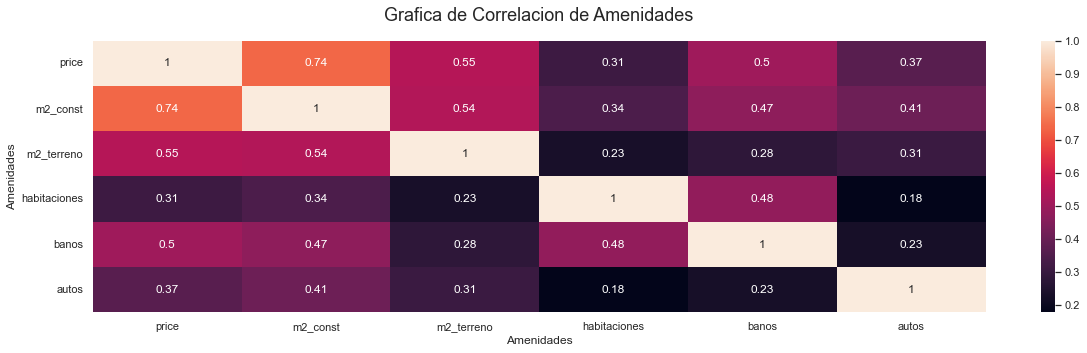

In [16]:
heatmap_corr(zona)

# Test Models

In [30]:
columns = ['m2_terreno', 'm2_const', 'habitaciones', 'banos', 'autos']
# Select Features
X = zona.loc[:, columns].values
# Select Target
y = zona.price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 72, test_size=.30)

In [31]:
ridge = hpt_ridge(X_train, y_train, X_test, y_test)

Score: 0.5514878704181843
Best Parameters: Ridge(alpha=13)


In [32]:
lin = hpt_linear(X_train, y_train, X_test, y_test)

CV Score: 0.62
Train score 0.55
Predict Score 0.55
-----------------
All Scores 0.57


In [ ]:
rf =hpt_random_forest(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


In [ ]:
rf.get_params

In [ ]:
compare_model_error(X_test, y_test, randomfores=rf, linear=lin, ridge=ridge )

In [ ]:
compare_score_models(X_train, X_test, y_train, y_test, linear=lin, ridge=ridge, randomfores= rf)

In [ ]:
m2_const= 84
habitaciones= 2
banos=2
autos=2
to_predict = np.array([[m2_const,habitaciones, banos, autos]])
to_predict

In [25]:
r_result = rf.predict(to_predict) 
r_result

array([1419960.23214497])

In [26]:
rid_result = lin.predict(to_predict)
rid_result

array([825420.8046875])

In [27]:
np.mean([r_result, rid_result])

1122690.5184162345

In [28]:
ridge_zona_result = ridge.predict(zona[columns].values)
rf_zona_result = rf.predict(zona[columns].values) 

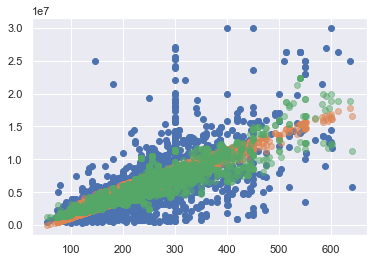

In [29]:
sns.set()
plt.scatter(x= zona.m2_const, y = zona.price )
plt.scatter(x= zona.m2_const, y = ridge_zona_result, alpha= 0.5 )
plt.scatter(x= zona.m2_const, y = rf_zona_result, alpha= 0.5 )